<a href="https://colab.research.google.com/github/Pavitrapanya/Sport-Data-Analysis-on-Cricket-Data/blob/main/Cricket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform  Exploratory Data Analysis on England tour of India 2021 Dataset

### Q 1: Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q2 : Load the 3 datasets ( batting, bowling and combined )

In [ ]:
combined=pd.read_csv('/content/combined.csv')
batting=pd.read_csv('/content/batting.csv')
bowling=pd.read_csv('/content/bowling.csv')


### Q 3: Display top 3 values of batting DataFrame

In [ ]:
batting.head(3)

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.00,676,54.43,1,0,0,35,2
1,JC Buttler,1,2,0,54,30,27.00,91,59.34,0,0,0,7,1
2,BA Stokes,4,8,0,203,82,25.37,403,50.37,0,2,0,22,5


### Q4 : Display no of rows and columns in every dataframe

In [ ]:
print("Combined Dataframe:","rows:",len(combined.axes[0])," cols:",len(combined.axes[1]))
print("Batting Dataframe:","rows:",len(batting.axes[0])," cols:",len(batting.axes[1]))
print("Bowling Dataframe:","rows:",len(bowling.axes[0])," cols:",len(bowling.axes[1]))

Combined Dataframe: rows: 31  cols: 12
Batting Dataframe: rows: 31  cols: 14
Bowling Dataframe: rows: 16  cols: 13


### Analysis and Visualisation

### Q5: Top 5 run scorers

In [ ]:
batting.sort_values('runs')[['Player','runs']].tail(5)

,Player,runs
20,R Ashwin,189
2,BA Stokes,203
19,RR Pant,270
18,RG Sharma,345
0,JE Root,368


### Q6 : Plot a graph for top 5 run scorers in the series

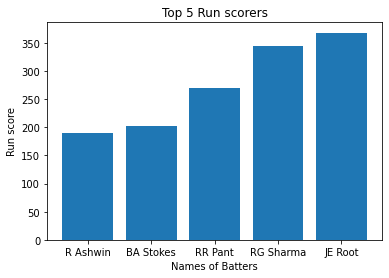

In [ ]:
names=pd.Series(batting.sort_values('runs')['Player'].tail(5))
Runs=pd.Series(batting.sort_values('runs')['runs'].tail(5))
plt.bar(names,Runs)
plt.xlabel('Names of Batters')
plt.ylabel("Run score")
plt.title("Top 5 Run scorers")
plt.show()

### Q7: Top 5 wicket takers

In [ ]:
bowling.sort_values('wickets')[['Player','wickets']].tail(5)

,Player,wickets
2,MM Ali,8
6,JM Anderson,8
4,MJ Leach,18
10,AR Patel,27
9,R Ashwin,32


### Q8 : Plot the top 5 wicket takers of the series ( Bar Graph)

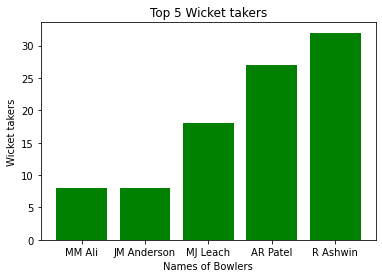

In [ ]:
names=pd.Series(bowling.sort_values('wickets')['Player'].tail(5))
Wickets=pd.Series(bowling.sort_values('wickets')['wickets'].tail(5))
plt.bar(names,Wickets,color='g')
plt.xlabel('Names of Bowlers')
plt.ylabel("Wicket takers")
plt.title("Top 5 Wicket takers")
plt.show()

### Q9: Best All-round performers
#### Use bat avg > 20 and bowling avg in between 20 to 30 as criteria

##### To judge allrounder, bowling should be least and batting average should be highest

In [ ]:
best_allrounder=combined[(combined['bat_avg'] > 20) & ((combined['bw_avg'] < 30) & (combined['bw_avg']>20))]

In [ ]:
best_allrounder

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.0,1,0,45.0,141,6,5/8,23.50
4,MM Ali,1,49,43,24.5,0,0,61.0,226,8,4/98,28.25


### Q 10: Plot the best allrounder graph ( Bar Graph)

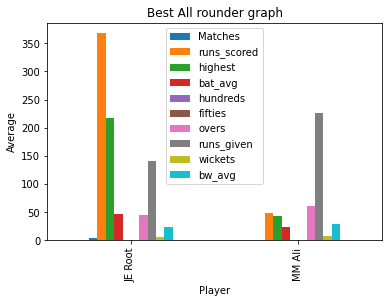

In [ ]:
#plt.bar(best_allrounder['Player'],best_allrounder['bw_avg'],best_allrounder['bat_avg'])
#best_allrounder.plot(x='Player',y=['bw_avg','bat_avg'],kind='bar',title='Best All rounder graph',ylabel='Average')

best_allrounder.plot(x='Player',kind='bar',title='Best All rounder graph',ylabel='Average')

### Q11: Who has the best batting average?

In [ ]:
max_avg = combined['bat_avg'].max()
combined[combined['bat_avg']==max_avg]

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
17,Washington Sundar,3,181,96,90.5,0,2,38.4,130,2,1/1,65.0


### Q12 : Who has the best bowling average?

In [ ]:
max_avg = combined['bw_avg'].max()
combined[combined['bw_avg']==max_avg]

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
17,Washington Sundar,3,181,96,90.5,0,2,38.4,130,2,1/1,65.0


### Q13 : Who has the highest strike rate?

In [ ]:
max_rate = combined['highest'].max()
print(combined[combined['highest']==max_rate]['Player'],"has the highest strike rate")

0    JE Root
Name: Player, dtype: object has the highest strike rate


### Q14 : How many people have scored Centuries. List them

In [ ]:
df=combined[combined['hundreds']>0]
print(df['wickets'].count(),"people have scored Centuries")

4 people have scored Centuries


### Q15 : How many people have got 5 wicket hauls?

In [ ]:
wh=combined.loc[combined['wickets']==5]==True
print(wh['wickets'].count()," people have got 5 wicket hauls")

2  people have got 5 wicket hauls


### Q16: Who has got highest wickets in an inning?

In [ ]:
hig_wick =bowling
hig_wick['wick_inn']=hig_wick['wickets']/hig_wick['innings']
hig_wick
maxi= hig_wick['wick_inn'].max()
hig_wick[hig_wick['wick_inn']==maxi]['Player']


10    AR Patel
Name: Player, dtype: object

### Q 17. Who has got best figure? ( More wicket and less runs given)

In [ ]:
figure=combined
figure['Best_figure']=figure['wickets']/figure['runs_given']
maxi=figure['Best_figure'].max()
figure[figure['Best_figure']==maxi]['Player']


25    AR Patel
Name: Player, dtype: object

### Q 18. Percentage runs and wickets for teams 
#### England ( till 17)
#### India ( after 17)

In [ ]:
eng=combined.iloc[:17,:]
ind=combined.iloc[17:,:]

### Q19 . Plot a pie chart for displaying the England run percentage

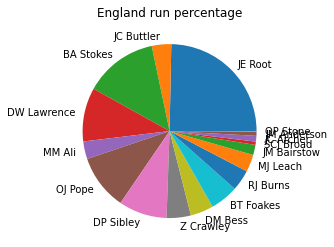

In [ ]:
runs=pd.Series(eng['runs_scored'])
names=pd.Series(eng['Player'])
plt.pie(runs,labels=names)
plt.title("England run percentage")
plt.show()

### Q20. Plot a pie chart for displaying the India run percentage

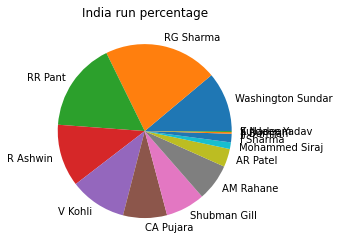

In [ ]:
runs=pd.Series(ind['runs_scored'])
names=pd.Series(ind['Player'])
plt.pie(runs,labels=names)
plt.title("India run percentage")
plt.show()